In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import operator
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
def save_highest_10(degree_lst, filename):
    df = pd.DataFrame(degree_lst, columns=['channel', 'degree'])
    df.to_csv('results/' + filename + '.csv')


    
def global_indeces(graph_names_lst):
    global_cc = []
    avg_path = []
    for g in graph_names_lst:

        adj = np.load('../part_1/results/npy/' + g + '.npy')
        G = nx.from_numpy_matrix(adj, create_using=nx.DiGraph())
        
        if nx.is_weakly_connected(G):
            global_cc.append(nx.average_clustering(G))
            avg_path.append(nx.average_shortest_path_length(G))
            
        else:
            global_cc.append(nx.average_clustering(G))
            
            G_un = nx.from_numpy_matrix(adj)
            connected_components = nx.connected_component_subgraphs(G_un)
            subgraphs = map(lambda smallGraph : G.subgraph(smallGraph.nodes()), connected_components)
            avgShortestPaths = np.mean(list(map(lambda x: nx.average_shortest_path_length(x), subgraphs )))
            avg_path.append(avgShortestPaths)

    return(global_cc, avg_path)



def global_plot(global_cc, avg_path, filename):
    densities = [5, 10, 20, 30, 50]
    
    plt.subplot(1,2,1)
    plt.plot(densities, global_cc, 'o-')
    plt.title('global_cc - PDC')

    plt.subplot(1,2,2)
    plt.plot(densities, avg_path, 'o-')
    plt.title('avg_path - PDC')
    #plt.show()
    plt.savefig('results/' + filename + '.png')
    

def get_coordinates():
    
    with open("../data/channel_locations.txt") as f:
        
        coord = {}
        
        channels = [row.split("        ") for row in f.readlines()[1:]]

        for elem in channels:
            coord[elem[1]] = (float(elem[2]), float(elem[3]))
        
        return coord
    
    
    
def get_labels_nodes(number_of_nodes = 64):
    if number_of_nodes == 64:
        return ['Fc5', 'Fc3', 'Fc1', 'Fcz', 'Fc2', 'Fc4', 'Fc6', 'C5', 'C3', 'C1',
                'Cz', 'C2', 'C4', 'C6', 'Cp5', 'Cp3', 'Cp1', 'Cpz', 'Cp2', 'Cp4',
                'Cp6', 'Fp1', 'Fpz', 'Fp2', 'Af7', 'Af3', 'Afz', 'Af4', 'Af8', 'F7',
                'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'Ft7', 'Ft8', 'T7',
                'T8', 'T9', 'T10', 'Tp7', 'Tp8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2',
                'P4', 'P6', 'P8', 'Po7', 'Po3', 'Poz', 'Po4', 'Po8', 'O1', 'Oz', 'O2', 'Iz']
    else:
        return ["Fp1", "Fp2", "F7", "F3", "Fz", "F4", "F8", "T7", "C3", "Cz",
                "C4", "T8", "P7", "P3", "Pz", "P4", "P8", "O1", "O2"]
    
def topology(G, filename, adj):
    
    G= nx.relabel_nodes(G, dict(enumerate(get_labels_nodes(adj.shape[0]))))

    # degree
    d = dict(nx.degree(G))
    plt.figure(num=None, figsize=(15,15), dpi=50)
    nx.draw(G, nodelist= list(d.keys()), node_size=[v*40  for v in d.values()], with_labels = True, pos = get_coordinates())
    plt.savefig('results/' + filename + '_degree' + '.png')
    
    # in degree
    d = dict(G.in_degree)
    plt.figure(num=None, figsize=(15,15), dpi=50)
    nx.draw(G, nodelist= list(d.keys()), node_size=[v*40  for v in d.values()], with_labels = True, pos = get_coordinates())
    plt.savefig('results/' + filename + '_in_degree' + '.png')
    
    # out degree
    d = dict(G.out_degree)
    plt.figure(num=None, figsize=(15,15), dpi=50)
    nx.draw(G, nodelist= list(d.keys()), node_size=[v*40  for v in d.values()], with_labels = True, pos = get_coordinates())
    plt.savefig('results/' + filename + '_out_degree' + '.png')

In [2]:
import utils as ut

import operator
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
######## 2.1

### PDC

# Read data
adj_eo_pdc = np.load('../part_1/results/npy/eo_pdc_20.npy')
G_eo_pdc =nx.from_numpy_matrix(adj_eo_pdc, create_using=nx.DiGraph())
G_eo_pdc = nx.relabel_nodes(G_eo_pdc, dict(enumerate(ut.get_labels_nodes(adj_eo_pdc.shape[0]))))

adj_ec_pdc = np.load('../part_1/results/npy/ec_pdc_20.npy')
G_ec_pdc =nx.from_numpy_matrix(adj_ec_pdc, create_using=nx.DiGraph())
G_ec_pdc = nx.relabel_nodes(G_ec_pdc, dict(enumerate(ut.get_labels_nodes(adj_ec_pdc.shape[0]))))

## GLOBAL INDICES 

# Clustering Coefficient

CC_eo_pdc = nx.average_clustering(G_eo_pdc)
CC_ec_pdc = nx.average_clustering(G_ec_pdc)

# Average shortest path length

avg_path_eo_pdc = nx.average_shortest_path_length(G_eo_pdc)
avg_path_ec_pdc = nx.average_shortest_path_length(G_ec_pdc)


## LOCAL INDICES 

# degree 
degree_10_eo_pdc = sorted(list(G_eo_pdc.degree), reverse=True, key=operator.itemgetter(1))[:10]
ut.save_highest_10(degree_10_eo_pdc, 'degree_eo_pdc')
degree_10_ec_pdc = sorted(list(G_ec_pdc.degree), reverse=True, key=operator.itemgetter(1))[:10]
ut.save_highest_10(degree_10_ec_pdc, 'degree_ec_pdc')

# in_degree
in_degree_10_eo_pdc = sorted(list(G_eo_pdc.in_degree), reverse=True, key=operator.itemgetter(1))[:10]
ut.save_highest_10(in_degree_10_eo_pdc, 'in_degree_eo_pdc')
in_degree_10_ec_pdc =sorted(list(G_ec_pdc.in_degree), reverse=True, key=operator.itemgetter(1))[:10]
ut.save_highest_10(in_degree_10_ec_pdc, 'in_degree_ec_pdc')

# out_degree
out_degree_10_eo_pdc = sorted(list(G_eo_pdc.out_degree), reverse=True, key=operator.itemgetter(1))[:10]
ut.save_highest_10(out_degree_10_eo_pdc, 'out_degree_eo_pdc')
out_degree_10_ec_pdc = sorted(list(G_ec_pdc.out_degree), reverse=True, key=operator.itemgetter(1))[:10]
ut.save_highest_10(out_degree_10_ec_pdc, 'out_degree_ec_pdc')



######## 2.2

######## 2.3

### DTF

# Read data
adj_eo_dtf = np.load('../part_1/results/npy/eo_dtf_20.npy')
G_eo_dtf =nx.from_numpy_matrix(adj_eo_dtf, create_using=nx.DiGraph())
G_eo_dtf = nx.relabel_nodes(G_eo_dtf, dict(enumerate(ut.get_labels_nodes(adj_eo_dtf.shape[0]))))


adj_ec_dtf = np.load('../part_1/results/npy/ec_dtf_20.npy')
G_ec_dtf =nx.from_numpy_matrix(adj_ec_dtf, create_using=nx.DiGraph())
G_ec_dtf = nx.relabel_nodes(G_ec_dtf, dict(enumerate(ut.get_labels_nodes(adj_ec_dtf.shape[0]))))

## GLOBAL INDICES 

# Clustering Coefficient

CC_eo_dtf = nx.average_clustering(G_eo_dtf)
CC_ec_dtf = nx.average_clustering(G_ec_dtf)

# Average shortest path length

avg_path_eo_dtf = nx.average_shortest_path_length(G_eo_dtf)
avg_path_ec_dtf = nx.average_shortest_path_length(G_ec_dtf)

# save
cc = pd.DataFrame([[CC_eo_pdc, CC_ec_pdc], [CC_eo_dtf, CC_ec_dtf]], columns=['pdc', 'dtf'])
avg_path = pd.DataFrame([[avg_path_eo_pdc, avg_path_ec_pdc], [avg_path_eo_dtf, avg_path_ec_dtf]], columns=['pdc', 'dtf'])

cc.to_csv('results/clustering_coefficient.csv')
avg_path.to_csv('results/average_shortest_path.csv')


######## 2.4

lst_eo = ['eo_pdc_05', 'eo_pdc_10', 'eo_pdc_20', 'eo_pdc_30', 'eo_pdc_50']
lst_ec = ['ec_pdc_05', 'ec_pdc_10', 'ec_pdc_20', 'ec_pdc_30', 'ec_pdc_50']

global_cc_eo = ut.global_indeces(lst_eo)[0]
avg_path_eo = ut.global_indeces(lst_eo)[1]

global_cc_ec = ut.global_indeces(lst_ec)[0]
avg_path_ec = ut.global_indeces(lst_ec)[1]

# save
ut.global_plot(global_cc_eo, global_cc_ec, avg_path_eo,avg_path_ec, 'global_indices_plot')


######## 2.5

ut.topology(G_eo_pdc, 'eo_pdc', adj_eo_pdc)
ut.topology(G_ec_pdc, 'ec_pdc', adj_ec_pdc)


######## 2.6

adj_ec2 = np.load('../part_1/results/npy/alt_ec_pdc_20.npy')
G_ec2 = nx.from_numpy_matrix(adj_ec2, create_using=nx.DiGraph())
G_ec2 = nx.relabel_nodes(G_ec2, dict(enumerate(ut.get_labels_nodes(adj_ec2.shape[0]))))
adj_eo2 = np.load('../part_1/results/npy/alt_eo_pdc_20.npy')
G_eo2 = nx.from_numpy_matrix(adj_eo2, create_using=nx.DiGraph())
G_eo2 = nx.relabel_nodes(G_eo2, dict(enumerate(ut.get_labels_nodes(adj_eo2.shape[0]))))


## GLOBAL INDICES 

CC_eo2 = nx.average_clustering(G_eo2)
CC_ec2 = nx.average_clustering(G_ec2)

avg_path_eo2 = nx.average_shortest_path_length(G_eo2)
avg_path_ec2 = nx.average_shortest_path_length(G_ec2)


df = pd.DataFrame([[CC_eo_pdc, CC_eo2, CC_ec_pdc, CC_ec2],
                      [avg_path_eo_pdc, avg_path_eo2, avg_path_ec_pdc, avg_path_ec2]], 
                     columns=['eo_pdc','alt_eo','ec_pdc','alt_ec'],
                 index = ['clustering_coefficient', 'avg_shortest_path_length'])
df.to_csv('results/graph_idx_comparison.csv')

## LOCAL INDICES 

# degree 
degree_10_eo2 = sorted(list(G_eo2.degree), reverse=True, key=operator.itemgetter(1))[:10]
ut.save_highest_10(degree_10_eo2, 'degree_alt_eo')
degree_10_ec2 = sorted(list(G_ec2.degree), reverse=True, key=operator.itemgetter(1))[:10]
ut.save_highest_10(degree_10_ec2, 'degree_alt_ec')

# in_degree
in_degree_10_eo2 = sorted(list(G_eo2.in_degree), reverse=True, key=operator.itemgetter(1))[:10]
ut.save_highest_10(in_degree_10_eo2, 'in_degree_alt_eo')
in_degree_10_ec2 =sorted(list(G_ec2.in_degree), reverse=True, key=operator.itemgetter(1))[:10]
ut.save_highest_10(in_degree_10_ec2, 'in_degree_alt_ec')

# out_degree
out_degree_10_eo2 = sorted(list(G_eo2.out_degree), reverse=True, key=operator.itemgetter(1))[:10]
ut.save_highest_10(out_degree_10_eo2, 'out_degree_alt_eo')
out_degree_10_ec2 = sorted(list(G_ec2.out_degree), reverse=True, key=operator.itemgetter(1))[:10]
ut.save_highest_10(out_degree_10_ec2, 'out_degree_alt_ec')



######## 2.7



In [ ]:
def viz_graph(file):
    
    adj = np.load("../part_1/results/npy/"+file+".npy")
    G = nx.from_numpy_matrix(adj, create_using = nx.DiGraph())
    G = nx.relabel_nodes(G, dict(enumerate(get_labels_nodes(adj.shape[0]))))

    # color
    for node in G.nodes():
        if node in get_labels_nodes(number_of_nodes = 19):
            color = 'red'
        else:
            color = '#b9c1d1'
        G.node[node]['color'] = color


    plt.figure(num=None, figsize=(15,15), dpi=50)
    nx.draw(G, node_shape= 'o', with_labels = True, pos = get_coordinates(), node_size = 2000, 
            node_color=list(nx.get_node_attributes(G,'color').values()), font_size=18) 
    #plt.title(file, fontsize=25) 

    #plt.show()
    plt.savefig("results/png/networks/"+file+".png", bbox_inches='tight')
    plt.close()
    return

In [11]:
def topology(G, filename, adj):
    
    G= nx.relabel_nodes(G, dict(enumerate(get_labels_nodes(adj.shape[0]))))
    
    # color
    for node in G.nodes():
        if node in get_labels_nodes(number_of_nodes = 19):
            color = 'red'
        else:
            color = '#b9c1d1'
        G.node[node]['color'] = color

    # degree
    d = dict(nx.degree(G))
    plt.figure(num=None, figsize=(15,15), dpi=50)
    nx.draw(G, nodelist= list(d.keys()), node_size=[v*100  for v in d.values()], with_labels = True, 
            pos = get_coordinates(),  font_size=18, node_color=list(nx.get_node_attributes(G,'color').values()))
    plt.savefig('results/' + filename + '_degree' + '.png')
    
    # in degree
    d = dict(G.in_degree)
    plt.figure(num=None, figsize=(15,15), dpi=50)
    nx.draw(G, nodelist= list(d.keys()), node_size=[v*100  for v in d.values()], with_labels = True, 
            pos = get_coordinates(),  font_size=18, node_color=list(nx.get_node_attributes(G,'color').values()))
    plt.savefig('results/' + filename + '_in_degree' + '.png')
    
    # out degree
    d = dict(G.out_degree)
    plt.figure(num=None, figsize=(15,15), dpi=50)
    nx.draw(G, nodelist= list(d.keys()), node_size=[v*100  for v in d.values()], with_labels = True, 
            pos = get_coordinates(), font_size=18, node_color=list(nx.get_node_attributes(G,'color').values()))
    #plt.show()
    plt.savefig('results/' + filename + '_out_degree' + '.png')

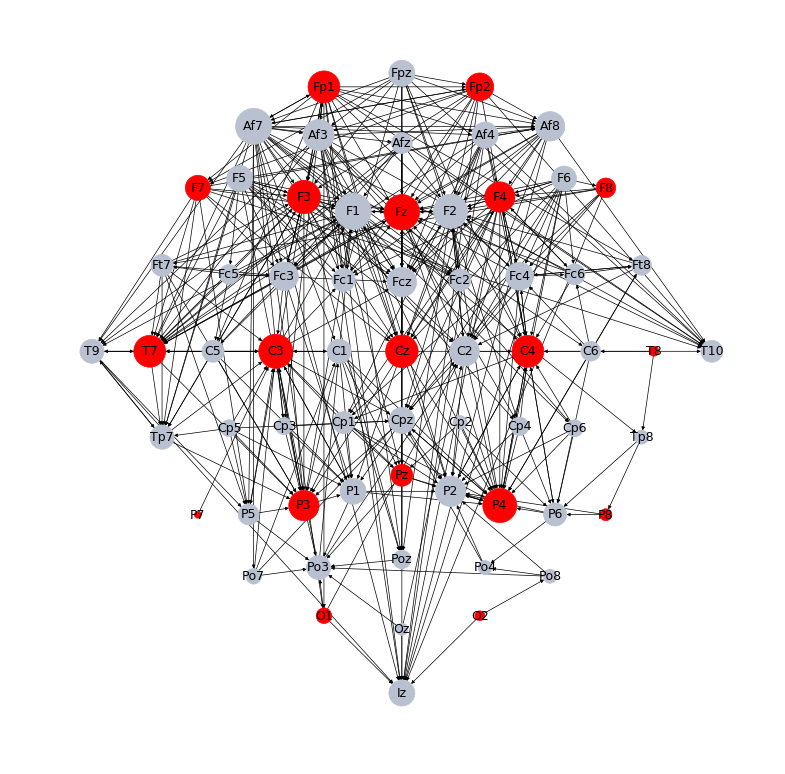

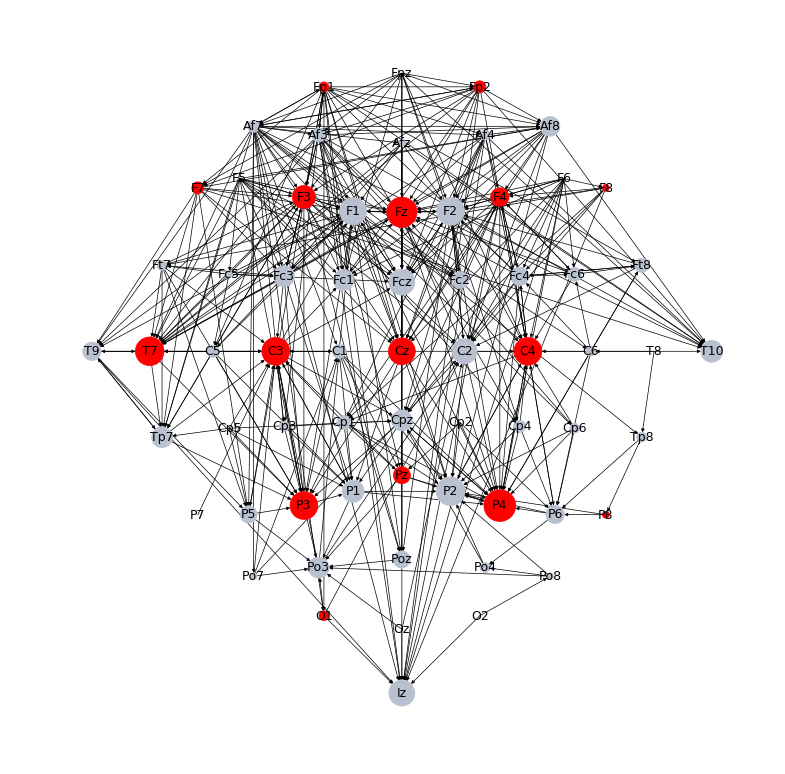

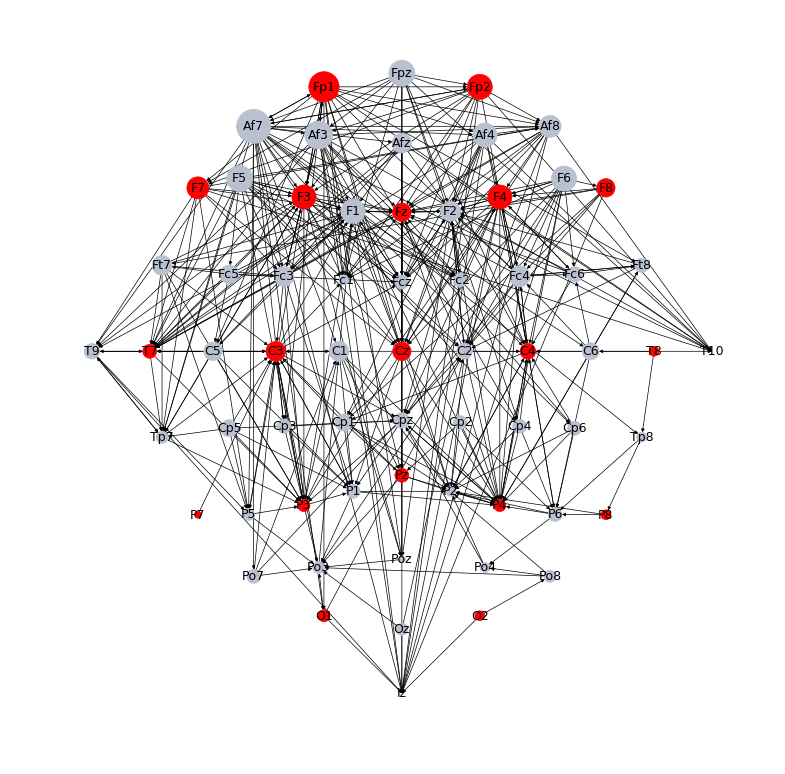

In [12]:
topology(G_eo_pdc, 'eo_pdc', adj_eo_pdc)

In [4]:
# Clustering Coefficient

CC_eo_dtf = nx.average_clustering(G_eo_dtf)
CC_ec_dtf = nx.average_clustering(G_ec_dtf)

# Average shortest path length

avg_path_eo_dtf = nx.average_shortest_path_length(G_eo_dtf)
avg_path_ec_dtf = nx.average_shortest_path_length(G_ec_dtf)

[('Af7', 27),
 ('F1', 27),
 ('Fz', 26),
 ('C3', 24),
 ('F2', 24),
 ('P4', 24),
 ('F3', 23),
 ('Cz', 22),
 ('C4', 21),
 ('Fp1', 21)]

In [81]:

def save_highest_10(degree_lst, filename):
    df = pd.DataFrame(degree_lst, columns=['channel', 'degree'])
    df.to_csv('results/' + filename + '.csv')
    
def get_labels_nodes(number_of_nodes = 64):
    if number_of_nodes == 64:
        return ['Fc5', 'Fc3', 'Fc1', 'Fcz', 'Fc2', 'Fc4', 'Fc6', 'C5', 'C3', 'C1',
                'Cz', 'C2', 'C4', 'C6', 'Cp5', 'Cp3', 'Cp1', 'Cpz', 'Cp2', 'Cp4',
                'Cp6', 'Fp1', 'Fpz', 'Fp2', 'Af7', 'Af3', 'Afz', 'Af4', 'Af8', 'F7',
                'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'Ft7', 'Ft8', 'T7',
                'T8', 'T9', 'T10', 'Tp7', 'Tp8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2',
                'P4', 'P6', 'P8', 'Po7', 'Po3', 'Poz', 'Po4', 'Po8', 'O1', 'Oz', 'O2', 'Iz']
    else:
        return ["Fp1", "Fp2", "F7", "F3", "Fz", "F4", "F8", "T7", "C3", "Cz",
                "C4", "T8", "P7", "P3", "Pz", "P4", "P8", "O1", "O2"]
    

In [83]:
dict(enumerate(get_labels_nodes(adj_ec_pdc.shape[0])))

{0: 'Fc5',
 1: 'Fc3',
 2: 'Fc1',
 3: 'Fcz',
 4: 'Fc2',
 5: 'Fc4',
 6: 'Fc6',
 7: 'C5',
 8: 'C3',
 9: 'C1',
 10: 'Cz',
 11: 'C2',
 12: 'C4',
 13: 'C6',
 14: 'Cp5',
 15: 'Cp3',
 16: 'Cp1',
 17: 'Cpz',
 18: 'Cp2',
 19: 'Cp4',
 20: 'Cp6',
 21: 'Fp1',
 22: 'Fpz',
 23: 'Fp2',
 24: 'Af7',
 25: 'Af3',
 26: 'Afz',
 27: 'Af4',
 28: 'Af8',
 29: 'F7',
 30: 'F5',
 31: 'F3',
 32: 'F1',
 33: 'Fz',
 34: 'F2',
 35: 'F4',
 36: 'F6',
 37: 'F8',
 38: 'Ft7',
 39: 'Ft8',
 40: 'T7',
 41: 'T8',
 42: 'T9',
 43: 'T10',
 44: 'Tp7',
 45: 'Tp8',
 46: 'P7',
 47: 'P5',
 48: 'P3',
 49: 'P1',
 50: 'Pz',
 51: 'P2',
 52: 'P4',
 53: 'P6',
 54: 'P8',
 55: 'Po7',
 56: 'Po3',
 57: 'Poz',
 58: 'Po4',
 59: 'Po8',
 60: 'O1',
 61: 'Oz',
 62: 'O2',
 63: 'Iz'}

In [111]:
d =dict(enumerate(get_labels_nodes(adj_ec_pdc.shape[0])))
df = pd.DataFrame(degree_10_eo2, columns=['channel', 'degree'])
df

,channel,degree
0,24,24
1,3,22
2,33,22
3,42,22
4,34,21
5,35,21
6,21,20
7,23,20
8,17,18
9,28,18


In [98]:
df.channel[0]

24

In [112]:
for i in range(len(df.channel)):
    df.channel[i] = d[df.channel[i]] 

/Users/silvia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [105]:
d[df.channel[0]] 

'Af7'

In [109]:
df

,channel,degree
0,Af7,24
1,Fcz,22
2,Fz,22
3,T9,22
4,F2,21
5,F4,21
6,Fp1,20
7,Fp2,20
8,Cpz,18
9,Af8,18
